In [1]:
from extract_features import *
from utils import *
from preprocessing import *
from sklearn.metrics import roc_curve, roc_auc_score

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11225633364996244569
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11285289370
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16919544552082836378
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 4719:00:00.0, compute capability: 3.7"
]
['/job:localhost/replica:0/task:0/device:GPU:0']
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3952453073716036700
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11285289370
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8399247690950372774
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 4719:00:00.0, compute capability: 3.7"
]
['/job:localhost/replica:0/task:0/device:GPU:0']


In [2]:
embedding_matrix, train_seq, val_seq, y_train, y_val = preprocess(dataset='vizwiz', n_classes=3, verbose=False)
val_data = (val_seq, y_val)

Dataset: vizwiz 
Features: ['QSN', 'descriptions', 'tags', 'dominant_colors', 'handwritten_text', 'ocr_text']


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
2019-04-09 17:01:23,325 : INFO : loading projection weights from /anaconda/envs/py35/lib/python3.5/site-packages/gensim/test/test_data/GoogleNews-vectors-negative300.bin
2019-04-09 17:02:04,782 : INFO : loaded (3000000, 300) matrix from /anaconda/envs/py35/lib/python3.5/site-packages/gensim/test/test_data/GoogleNews-vectors-negative300.bin


Total 3000000 word vectors


In [3]:
L = 1e-3
R = 1e-14
B = 64
E = 300
model, history = skill_predictor(train_seq, embedding_matrix,
                 train_labels=y_train,
                 val_data=(val_seq,y_val),
                 learning_rate=L,
                 lstm_dim=100,
                 batch_size=B,
                 num_epochs=E,
                 optimizer_param=SGD(lr=L, nesterov=True),
                 regularization=R, n_classes=3)

Log file: ./LSTM/0.001_1e-14_64_300.log


In [29]:
preds = model.predict(val_seq, verbose=0)
y_pred_text = [1 if i >= 0.5 else 0 for i in preds[:,0]]
y_pred_color = [1 if i >= 0.5 else 0 for i in preds[:,1]]
y_pred_counting = [1 if i >= 0.5 else 0 for i in preds[:,2]]
print("VizWiz, all features - accuracy\ntext: {}\ncolor:{}\ncounting:{}".format(accuracy_score(y_val[:,0], y_pred_text),
                                                        accuracy_score(y_val[:,1], y_pred_color),
                                                        accuracy_score(y_val[:,2], y_pred_counting)))

VizWiz, all features - accuracy
text: 0.5896751223854028
color:0.6194926568758344
counting:0.9657320872274143


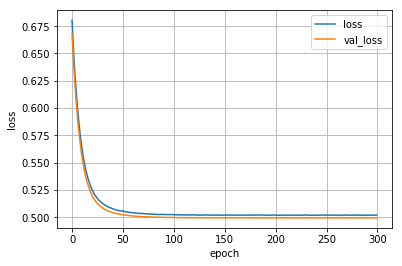

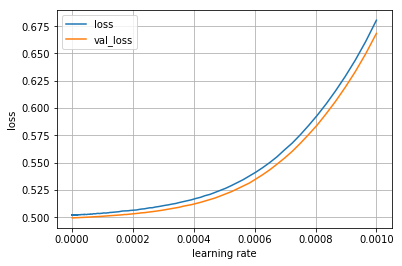

In [5]:
log = pd.read_csv("./LSTM/0.001_1e-14_64_300.log")
plt.plot(log['epoch'].values, log['loss'].values, label='loss')
plt.plot(log['epoch'].values, log['val_loss'].values, label='val_loss')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()

plt.plot(log['lr'].values, log['loss'].values, label='loss')
plt.plot(log['lr'].values, log['val_loss'].values, label='val_loss')
plt.legend()
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.grid()
plt.show()

## 2 classes: text and color

In [2]:
embedding_matrix, train_seq, val_seq, y_train, y_val = preprocess(dataset='vizwiz', verbose=False)
val_data = (val_seq, y_val)

Dataset: vizwiz 
Features: ['QSN', 'descriptions', 'tags', 'dominant_colors', 'handwritten_text', 'ocr_text']


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
2019-04-10 02:14:11,626 : INFO : loading projection weights from /anaconda/envs/py35/lib/python3.5/site-packages/gensim/test/test_data/GoogleNews-vectors-negative300.bin
2019-04-10 02:14:51,984 : INFO : loaded (3000000, 300) matrix from /anaconda/envs/py35/lib/python3.5/site-packages/gensim/test/test_data/GoogleNews-vectors-negative300.bin


Total 3000000 word vectors


In [ ]:
L = 1e-3
R = 1e-14
B = 64
E = 300
model, history = skill_predictor(train_seq, embedding_matrix,
                 train_labels=y_train,
                 val_data=(val_seq,y_val),
                 learning_rate=L,
                 lstm_dim=100,
                 batch_size=B,
                 num_epochs=E,
                 optimizer_param=SGD(lr=L, nesterov=True),
                 regularization=R, n_classes=2)

Log file: ./LSTM/0.001_1e-14_64_300.log


In [ ]:
# todo: run 3 node on VQA and see counting performance